In [1]:
%load_ext autoreload
%autoreload 2
import os
import numpy as np
import json
import cv2
import PIL
import sys

sys.path.append('../')
from cnn_utils import file_utils, vis_utils

import plot_utils

import tensorflow as tf
import keras.backend as K
gpu_ids = [1]
# set gpu id and tf settings
os.environ['CUDA_VISIBLE_DEVICES']=','.join([str(g) for g in gpu_ids])
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
K.tensorflow_backend.set_session(tf.Session(config=config))


# adni
load_from_dir = './experiments/GLT_adni-unnorm-masked_100ul_subj-OASIS_OAS1_0327-l-to-subjs_voxelmorphbidir_flow_cvae_color_c-srcsp_cvaeenc32-32-32-32-32-64_glatent500_pt1000_frzflow_grad_l2_regfwt1_cc_vm_wt1_win9_grad-30seg-l2_regcwt6.9e+06_l2_sigI0.1'


with open(os.path.join(load_from_dir, 'arch_params.json'), 'r') as f:
	arch_params = json.load(f)
with open(os.path.join(load_from_dir, 'data_params.json'), 'r') as f:
	data_params = json.load(f)

from experiments_VTE import GLTExperimentClass	
exp = GLTExperimentClass.ExperimentGlobalLocalTransforms(data_params, arch_params)
model_name = exp.get_model_name()

model_name, exp_dir, figures_dir, logs_dir, models_dir = file_utils.make_output_dirs(model_name, prompt_delete=False)
exp.save_exp_info(exp_dir, figures_dir, models_dir, logs_dir)

exp.data_params['load_vols'] = False
exp.load_data(load_fewer=True)

# create models and load existing ones if necessary
exp.create_models()




Using TensorFlow backend.


[2018-11-11 14:26:27] Loading adni dataset adni-unnorm-masked_100ul_subj-OASIS_OAS1_0327-l
[2018-11-11 14:26:27] Params: {'dataset_name': 'adni', 'source_name': 'centroidsubj2', 'target_name': 'subjs', 'unnormalized': True, 'masked': True, 'n_shot': 1, 'use_atlas_as_source': False, 'use_subject': 'OASIS_OAS1_0327_MR1_mri_talairach_orig', 'img_shape': [160, 192, 224, 1], 'pred_img_shape': [160, 192, 1], 'aug_img_shape': [160, 192, 224, 1], 'n_unlabeled': 100, 'n_validation': 50, 'load_vols': False, 'aug_in_gen': True, 'n_vte_aug': None, 'n_flow_aug': None, 'use_labels': [0, 16, 10, 49, 8, 47, 4, 43, 7, 46, 12, 51, 2, 41, 28, 60, 11, 50, 13, 52, 17, 53, 14, 15, 18, 54, 24, 3, 42, 31, 63], 'final_test': False, 'warp_labels': True, 'n_dims': 3, 'split_id': None, 'orig_img_shape': (160, 192, 224, 1), 'scale': 1.0, 'source_train_files': ['/data/ddmg/voxelmorph/data/t1_mix/proc/resize256-crop_x32/train/origs/OASIS_OAS1_0327_MR1_mri_talairach_orig.npz', '/data/ddmg/voxelmorph/data/t1_mix/proc/

Got list of 7329 files from /data/ddmg/voxelmorph/data/t1_mix/proc/resize256-crop_x32/train/origs/*.npz:
ADNI_ADNI-3T-FS-5.3-Long_293689.long.016_S_4591_base_mri_talairach_orig.npz
ADNI_ADNI-3T-FS-5.3-Long_78841.long.016_S_1326_base_mri_talairach_orig.npz
ADNI_ADNI-1.5T-FS-5.3-Long_436815.long.094_S_1330_base_mri_talairach_orig.npz
ADNI_ADNI-3T-FS-5.3-Long_296323.long.068_S_2168_base_mri_talairach_orig.npz
ADNI_ADNI-3T-FS-5.3-Long_388923.long.135_S_5273_base_mri_talairach_orig.npz
ADNI_ADNI-3T-FS-5.3-Long_272700.long.009_S_4388_base_mri_talairach_orig.npz
ADNI_ADNI-1.5T-FS-5.3-Long_394785.long.027_S_0408_base_mri_talairach_orig.npz
PPMI_3519_mri_talairach_orig.npz
ADNI_ADNI-3T-FS-5.3-Long_119158.long.053_S_0507_base_mri_talairach_orig.npz
ADNI_ADNI-1.5T-FS-5.3-Long_63306.long.007_S_0249_base_mri_talairach_orig.npz
ABIDE_50685_mri_talairach_orig.npz
ADNI_ADNI-1.5T-FS-5.3-Long_121666.long.041_S_1423_base_mri_talairach_orig.npz
GSP_120719_TT88SP_FS_mri_talairach_orig.npz
COBRE_0040043_mri

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
stacked_input (InputLayer)      (None, 160, 192, 224 0                                            
__________________________________________________________________________________________________
vte_enc_conv3D_0_1 (Conv3D)     (None, 160, 192, 224 1760        stacked_input[0][0]              
__________________________________________________________________________________________________
vte_enc_leakyrelu_0_1 (LeakyReL (None, 160, 192, 224 0           vte_enc_conv3D_0_1[0][0]         
__________________________________________________________________________________________________
vte_maxpool3D_0 (MaxPooling3D)  (None, 80, 96, 112,  0           vte_enc_leakyrelu_0_1[0][0]      
__________________________________________________________________________________________________
vte_enc_co

vm_bidir_bck_model
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 160, 192, 224 0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 160, 192, 224 0                                            
__________________________________________________________________________________________________
concatenate_6 (Concatenate)     (None, 160, 192, 224 0           input_3[0][0]                    
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
conv3d_12 (Conv3D)              (None, 80, 96, 112,  880         concatenate_6[0][0]      

color_transformer_cvae
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_input (InputLayer)          (None, 160, 192, 224 0                                            
__________________________________________________________________________________________________
color_enc_conv3D_0 (Conv3D)     (None, 80, 96, 112,  896         img_input[0][0]                  
__________________________________________________________________________________________________
color_enc_leakyrelu_0 (LeakyReL (None, 80, 96, 112,  0           color_enc_conv3D_0[0][0]         
__________________________________________________________________________________________________
color_enc_conv3D_1 (Conv3D)     (None, 40, 48, 56, 3 27680       color_enc_leakyrelu_0[0][0]      
______________________________________________________________________________________

In [2]:

load_epoch = 'latest'
# load_epoch = 1090
# compile models for training
start_epoch = exp.load_models(models_dir, load_epoch)
exp.compile_models()

exp.create_generators(batch_size=1)


[2018-11-11 14:26:38] Looking for epoch latest in ./experiments/GLT_adni-unnorm-masked_100ul_subj-OASIS_OAS1_0327-l-to-subjs_voxelmorphbidir_flow_cvae_color_c-srcsp_cvaeenc32-32-32-32-32-64_glatent500_pt1000_frzflow_grad_l2_regfwt1_cc_vm_wt1_win9_grad-30seg-l2_regcwt6.9e+06_l2_sigI0.1/models
Saving vm_bidir_fwd_model
Saving vm_bidir_bck_model
Saving color_transform_encoder_cvae
Saving color_transformer_cvae
[(None, 160, 192, 224, 1), (None, 160, 192, 224, 3)]
[(None, 160, 192, 224, 1), (None, 160, 192, 224, 3)]
[2018-11-11 14:26:46] Switching trainer model to SequentialBidir
[2018-11-11 14:26:46] __________________________________________________________________________________________________
[2018-11-11 14:26:46] Layer (type)                    Output Shape         Param #     Connected to                     
[2018-11-11 14:26:46] ==================================================================================================
[2018-11-11 14:26:46] img_input_src (InputLayer)      (

[2018-11-11 14:26:46] Model output: Tensor("color_transformer_cvae_trainer_1/latent_logvar/Reshape:0", shape=(?, 500), dtype=float32), loss fn: <bound method VAE_metrics.kl_log_sigma of <metrics.VAE_metrics object at 0x7f6a35a296a0>>
[2018-11-11 14:26:46] Model output: Tensor("st_colored_flowtgtspace_2/map/TensorArrayStack/TensorArrayGatherV3:0", shape=(?, 160, 192, 224, 1), dtype=float32), loss fn: <function mean_squared_error at 0x7f6b9d802730>
[2018-11-11 14:26:46] and 8 weights [1, 1, 0.0, 6881280.0, 0.0, 1.0, 1.0, 344063999.99999994]
[<class 'int'>, <class 'int'>, <class 'float'>, <class 'numpy.float64'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'numpy.float64'>]
vm_bidir_fwd_model
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 160, 192, 224 0                                   

vm_bidir_bck_model
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 160, 192, 224 0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 160, 192, 224 0                                            
__________________________________________________________________________________________________
concatenate_6 (Concatenate)     (None, 160, 192, 224 0           input_3[0][0]                    
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
conv3d_12 (Conv3D)              (None, 80, 96, 112,  880         concatenate_6[0][0]      

[2018-11-11 14:26:48] Looking for models in ./experiments/GLT_adni-unnorm-masked_100ul_subj-OASIS_OAS1_0327-l-to-subjs_voxelmorphbidir_flow_cvae_color_c-srcsp_cvaeenc32-32-32-32-32-64_glatent500_pt1000_frzflow_grad_l2_regfwt1_cc_vm_wt1_win9_grad-30seg-l2_regcwt6.9e+06_l2_sigI0.1/models
[2018-11-11 14:26:48] Loading model vm_bidir_fwd_model from ./experiments/GLT_adni-unnorm-masked_100ul_subj-OASIS_OAS1_0327-l-to-subjs_voxelmorphbidir_flow_cvae_color_c-srcsp_cvaeenc32-32-32-32-32-64_glatent500_pt1000_frzflow_grad_l2_regfwt1_cc_vm_wt1_win9_grad-30seg-l2_regcwt6.9e+06_l2_sigI0.1/models/vm_bidir_fwd_model_epoch1155_iter115500.h5
[2018-11-11 14:26:49] Loading model vm_bidir_bck_model from ./experiments/GLT_adni-unnorm-masked_100ul_subj-OASIS_OAS1_0327-l-to-subjs_voxelmorphbidir_flow_cvae_color_c-srcsp_cvaeenc32-32-32-32-32-64_glatent500_pt1000_frzflow_grad_l2_regfwt1_cc_vm_wt1_win9_grad-30seg-l2_regcwt6.9e+06_l2_sigI0.1/models/vm_bidir_bck_model_epoch1155_iter115500.h5
[2018-11-11 14:26:49]

[(1, 160, 192, 224, 3), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1)]


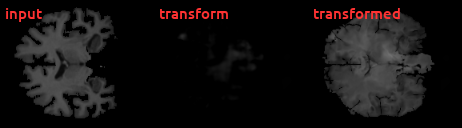

[(1, 160, 192, 224, 3), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1)]


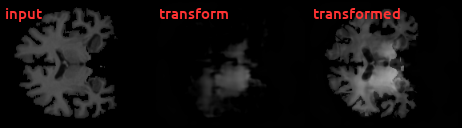

[(1, 160, 192, 224, 3), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1)]


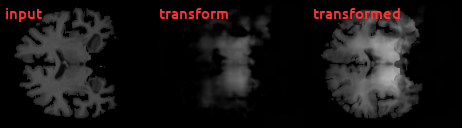

[(1, 160, 192, 224, 3), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1)]


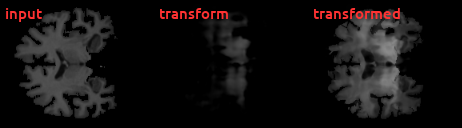

In [9]:
# Try sampling from p(beta) and p(z|x)
import IPython
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important;  }</style>"))
n_digits = 2

input_ims = []
target_ims = []

slice_idx = 112

for i in range(n_digits * 2):
    if i < n_digits:
        X, Y = next(exp.train_gen)
    else:
        X, Y = next(exp.valid_gen)
    
    input_im = X[0]
    n_dims = len(input_im.shape) - 2
    if n_dims > 2:
        input_im_display = input_im[:, :, :, slice_idx, :]
    else:
        input_im_display = input_im
    
    zs_sampled = exp._sample_from_prior(input_im, batch_size=1)
    
    preds = exp.tester_model.predict([input_im] + zs_sampled)
    color_delta = preds[-3]
    print([p.shape for p in preds])
    
    
    
    if n_dims > 2:
        transformed_im = preds[-1][:, :, :, slice_idx, :]
    else:
        transformed_im = preds[-1]
    
    p_out_im = np.concatenate([
        vis_utils.label_ims(input_im_display, 'input'),
#         vis_utils.label_ims(zs_sampled[0][:, :, :, slice_idx], 'flowtgt'),
#         vis_utils.label_ims(zs_sampled[1][:, :, :, slice_idx], 'colortgt'),
        vis_utils.label_ims(color_delta[:, :, :, slice_idx], 'transform'),
        vis_utils.label_ims(transformed_im, 'transformed'),
    ], axis=1)

  
    IPython.display.display(PIL.Image.fromarray(p_out_im[:, :, [2, 1, 0]]))

In [ ]:
n_samples = 400
curr_vae = exp.vae_color

# import sklearn.decomposition as skld
# import sklearn.manifold as sklm
import classification_utils


%matplotlib inline
# ims = [None] * n_samples
# local_z_means = [None] * n_samples
# labels = [None] * n_samples



# run model on several hundred examples and save the vectors
src_ims = [None] * n_samples
tgt_ims = [None] * n_samples
pred_flows = [None] * n_samples
pred_sigmas = [None] * n_samples # only if we are predicting recon sigma
pred_recons = [None] * n_samples
local_qz_means = [None] * n_samples
local_pz_means = [None] * n_samples
local_qz_logvars = [None] * n_samples
local_pz_logvars = [None] * n_samples
global_z_means = [None] * n_samples
global_z_logvars = [None] * n_samples
labels = [None] * n_samples

train_idxs = []
test_idxs = []
label_mapping = exp.label_mapping
for i in range(n_samples):
    if i < n_samples * 0.5:
        X, Y, X_oh, _ = next(exp.train_gen)
        train_idxs.append(i)
    else:
        X, Y, X_oh, _ = next(exp.test_gen)
        test_idxs.append(i)
    label = classification_utils.onehot_to_labels(X_oh, label_mapping=label_mapping)

    preds = curr_vae.trainer_model.predict(X)
    if i==0:
        print('Number of model outputs: {}'.format(len(preds)))
    if not exp.arch_params['local_only']:
        global_z_means[i], global_z_logvars[i] = preds[:2]
        local_z_mean, local_z_logvar = preds[2:4]
    else:
        local_z_mean, local_z_logvar = preds[:2]
        
    if exp.sigma_Iw == 'learned':
        flow = preds[-5]
        pred_sigmas[i] = np.exp(preds[-4]/2.)
        pred_recons[i] = preds[-3]
    elif 'flow' in exp.arch_params['model_arch'] and 'color' in exp.arch_params['model_arch']:
        flow = preds[2]
        pred_recons[i] = preds[3]
    else:
        flow = preds[-4]
        pred_recons[i] = preds[-3]
    
    # now see what our p(z|x) network predicts
    preds = curr_vae.img_encoding_model.predict(X[0])
    local_pz_mean = preds[0]
    local_pz_logvar = preds[1]
    
    src_ims[i] = X[0]
    tgt_ims[i] = X[1]
    pred_flows[i]= flow
    
    labels[i] = label
    local_qz_means[i] = local_z_mean
    local_pz_means[i] = local_pz_mean
    
    local_qz_logvars[i] = local_z_logvar
    local_pz_logvars[i] = local_pz_logvar
    
    
src_ims = np.concatenate(src_ims, axis=0)
tgt_ims = np.concatenate(tgt_ims, axis=0)
pred_flows = np.concatenate(pred_flows, axis=0)
labels = np.concatenate(labels, axis=0)
local_qz_means = np.concatenate(local_qz_means, axis=0)
local_pz_means = np.concatenate(local_pz_means, axis=0)
local_qz_logvars = np.concatenate(local_qz_logvars, axis=0)
local_pz_logvars = np.concatenate(local_pz_logvars, axis=0)
pred_recons = np.concatenate(pred_recons, axis=0)

if not exp.arch_params['local_only']:
    global_z_means = np.concatenate(global_z_means, axis=0)
    global_z_logvars = np.concatenate(global_z_logvars, axis=0)
    
if exp.sigma_Iw == 'learned':
    pred_sigmas = np.concatenate(pred_sigmas, axis=0)
    
# pca_qz_fitter = skld.PCA(n_components=local_transform_latent_dim)
# pcs_qz_means = pca_qz_fitter.fit_transform(local_qz_means)
# pcs_qz_plus_std = pca_qz_fitter.transform(local_qz_means + np.exp(local_qz_logvars/2.))
# pcs_qz_std = pcs_qz_plus_std - pcs_qz_means

# pca_pz_fitter = skld.PCA(n_components=local_transform_latent_dim)
# pcs_pz_means = pca_pz_fitter.fit_transform(local_pz_means)
# pcs_pz_plus_std = pca_pz_fitter.transform(local_pz_means + np.exp(local_pz_logvars/2.))
# pcs_pz_std = pcs_pz_plus_std - pcs_pz_means

# qz_tsne = sklm.TSNE(n_components=2).fit_transform(local_qz_means)
# pz_tsne = sklm.TSNE(n_components=2).fit_transform(local_pz_means)


In [5]:
# boxplots of standard deviations
print(local_qz_logvars.shape)
%matplotlib inline
import matplotlib.pyplot as plt

# if we have a local latent variable
if not exp.arch_params['global_only']:
    fig = plt.figure(1, figsize=(20, 8))
    #fig, (ax1, ax2) = fig.subplots(1,2)
    ax1 = fig.add_subplot(121)
    ax1.boxplot(local_qz_means)
    ax1.set_title('q(z|x,y) mean')
    ax2 = fig.add_subplot(122)
    ax2.boxplot(local_pz_means)
    ax2.set_title('p(z|x) mean')
    plt.show()

    fig = plt.figure(2, figsize=(20, 8))
    #fig, (ax1, ax2) = fig.subplots(1,2)
    ax1 = fig.add_subplot(121)
    ax1.boxplot(np.exp(local_qz_logvars/2.))
    ax1.set_title('q(z|x,y) std')
    ax2 = fig.add_subplot(122)
    ax2.boxplot(np.exp(local_pz_logvars/2.))
    ax2.set_title('p(z|x) std')
    plt.show()

if not exp.arch_params['local_only']:
    fig = plt.figure(3, figsize=(20, 8))    
    ax1 = fig.add_subplot(121)
    ax1.boxplot(global_z_means)
    ax1.set_title('beta(z|x,y) mean')
    ax2 = fig.add_subplot(122)
    ax2.boxplot(np.exp(global_z_logvars/2.))
    ax2.set_title('beta(z|x,y) std')
    plt.show()   


NameError: name 'local_qz_logvars' is not defined

In [ ]:
# plot predicted sigmas if we are doing that in the model
if exp.sigma_Iw == 'learned':
    h = pred_sigmas.shape[1]
    print(pred_sigmas.shape)
    pred_sigma_means = np.round(np.mean(pred_sigmas[:, h/2-10:h/2+10, w/2-10:w/2+10, 0], 
                       axis=(1, 2)),2)
    #plot_embedding(local_qz_means[:, plot_dims], None, pred_sigma_means, 'sigmas') # show numbers
    pred_sigmas_vis = np.concatenate([
        vis_utils.label_ims(
            pred_sigmas[[i]], 
            labels=['{}'.format(round(np.median(pred_sigmas[i]),1))],
            normalize=True,
            display_h=80,
        )[np.newaxis,:,:,:] for i in range(pred_sigmas.shape[0])], axis=0)
    print(pred_sigmas_vis.shape)
    plot_embedding(local_qz_means[:, plot_dims], pred_sigmas_vis, pred_sigma_means, 'sigmas')
    
    fig = plt.figure(2, figsize=(20, 10))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    pred_sigma_medians = np.median(pred_sigmas, axis=(1,2))   
    plot_embedding(local_qz_means[:, plot_dims], tgt_ims, pred_sigma_means, 'targets', ax1)
    plot_embedding(local_qz_means[:, plot_dims], None, pred_sigma_means, 'sigmas', ax2)
    
    fig = plt.figure(3, figsize=(20, 10))
    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)
    pred_sigma_medians = np.median(pred_sigmas, axis=(1,2))   
    plot_utils.visualize_embedding(local_qz_means[train_idxs, plot_dims], pred_recons, pred_sigma_means, 'reconstructions', ax1)
    plot_utils.visualize_embedding(local_qz_means[train_idxs, plot_dims], None, pred_sigma_means, 'sigmas', ax2)
    plot_utils.visualize_embedding(local_qz_means[test_idxs, plot_dims], None, pred_sigma_means, 'sigmas', ax2)
    plt.show()
    

    plt.boxplot(pred_sigma_medians)
    

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
# show embeddings from q(z|x,y) and p(z|x)
pred_flow_ims = vis_utils.label_ims(pred_flows, clip_flow=10)
print(pred_flows.shape)
_, h, w, _ = pred_flows.shape

flow_vectors = np.mean(pred_flows[:, h/2-10:h/2+10, w/2-10:w/2+10, :], 
                       axis=(1, 2))

# plot principal components
# fig = plt.figure(1, figsize=(20, 8))
# ax1 = fig.add_subplot(121)
# ax2 = fig.add_subplot(122)
# plot_embedding(pcs_qz_means[:, 2:4], pred_flows, labels, 'q(z|x, y) tsne', ax1)
# plot_embedding(pcs_qz_means[:, 2:4], ims, labels, 'q(z|x, y) tnse', ax2)
# plt.show()

# # plot tsne
# fig = plt.figure(1, figsize=(20, 8))
# ax1 = fig.add_subplot(121)
# ax2 = fig.add_subplot(122)
# plot_embedding(qz_tsne, pred_flows, labels, 'q(z|x, y) tsne', ax1)
# plot_embedding(qz_tsne, ims, labels, 'q(z|x, y) tnse', ax2)
# plt.show()

# plot tsne
# fig = plt.figure(1, figsize=(20, 8))
# ax1 = fig.add_subplot(121)
# ax2 = fig.add_subplot(122)
# plot_utils.visualize_embedding(pz_tsne,pred_flows, labels, 'p(z|x) tsne', ax1)
# plot_utils.visualize_embedding(pz_tsne, src_ims, labels, 'p(z|x) tnse', ax2)
# plt.show()

if local_transform_latent_dim == 2:
    plot_dims = [[0, 1]]
elif local_transform_latent_dim >= 4:
    plot_dims = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]

# split into train and test for easy visualization
train_qz_means = local_qz_means[train_idxs]
test_qz_means = local_qz_means[test_idxs]

train_pz_means = local_pz_means[train_idxs]
test_pz_means = local_pz_means[test_idxs]

for pd in plot_dims:
    fig = plt.figure(1, figsize=(20, 8))
    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)
    plot_utils.visualize_embedding(train_qz_means[:, pd], pred_flows[train_idxs], labels[train_idxs], 
                                   'q(z|x, y), dims {}'.format(pd), ax1)
    _, x_lims, y_lims = plot_utils.visualize_embedding(train_qz_means[:, pd], tgt_ims[train_idxs], labels[train_idxs], 
                                                       'q(z|x, y), target ims, dims {}'.format(pd), ax2)
    plot_utils.visualize_embedding(test_qz_means[:, pd], tgt_ims[test_idxs], labels[test_idxs], 
                                   'q(z|x, y), target ims, dims {}'.format(pd), ax3, x_lims=x_lims, y_lims=y_lims)
    #plot_embedding(local_qz_means[:, plot_dims], pred_sigmas_vis, labels, 'sigmas', ax3)
    plt.show()

    fig = plt.figure(1, figsize=(20, 8))
    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)
    plot_utils.visualize_embedding(train_pz_means[:, pd], pred_flows[train_idxs], labels[train_idxs], 'p(z|x), flows, dims {}'.format(pd), ax1)
    _, x_lims, y_lims = plot_utils.visualize_embedding(train_pz_means[:, pd], src_ims[train_idxs], labels[train_idxs], 'p(z|x), src ims, dims {}'.format(pd), ax2)
    plot_utils.visualize_embedding(test_pz_means[:, pd], src_ims[test_idxs], labels[test_idxs], 
                                   'p(z|x), src ims, dims {}'.format(pd), ax3, x_lims=x_lims, y_lims=y_lims)
    #plot_embedding(local_pz_means[:, plot_dims], pred_sigmas_vis, labels, 'sigmas', ax3)

    #plot_vectors(local_pz_means[:, plot_dims], flow_vectors, ax3)
    plt.show()



if not exp.arch_params['local_only']:
    fig = plt.figure(1, figsize=(20, 8))
    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)
    plot_utils.visualize_embedding(global_z_means, pred_flows, labels, 'p(beta|x), flows', ax1)
    plot_utils.visualize_embedding(global_z_means, src_ims, labels, 'p(beta|x), src ims', ax2)
    plot_utils.visualize_embedding(global_z_means, src_ims, labels, 'p(beta|x), src ims', ax2)
    plt.show()
    

    

NameError: name 'pred_flows' is not defined

In [ ]:
label_mapping = exp.label_mapping
## for a given X, see what q(z|x, y) is distributed as for different Ys
X_src, Y, X_oh, _ = next(exp.test_gen)
label_src = classification_utils.onehot_to_labels(X_oh, label_mapping=label_mapping)

if X_src[0][0].shape[-1] == 3:
    im = (X_src[0][0][:, :, [2, 1, 0]] * 255).astype(np.uint8)
    
    
else:
    im = X_src[0][0, :, :, 0]
    im = im - np.min(im)
    im = im / np.max(im)
    im = (im * 255.).astype(np.uint8)
    
IPython.display.display(PIL.Image.fromarray(im))
n_samples = 200

ims = []
flows = []
local_qz_means = []
local_pz_means = []
local_qz_logvars = []
local_pz_logvars = []
labels = []
losses = []

curr_trainer = exp.vae_flow.trainer_model

for i in range(n_samples):
    X, Y, _, Y_oh = next(exp.test_gen)
    
    label = classification_utils.onehot_to_labels(Y_oh, label_mapping=label_mapping)
    X = [X_src[0], X[1]]
    
    
    preds = curr_trainer.predict(X)
    
    # evaluate loss terms
    curr_labels = [
        np.zeros((1, local_transform_latent_dim)), # qz mean
        np.zeros((1, local_transform_latent_dim)), # qz logvar
        np.zeros(X[0].shape[:-1] + (2,)), # flow reg,
        X[1],  # transformed im,
        np.zeros((1, local_transform_latent_dim)), # pz mean
        np.zeros((1, local_transform_latent_dim)), # pz logvar        
    ]
     
    
    #loss = exp.trainer_model.evaluate(X, curr_labels, verbose=False)   
    #print(loss)
    #global_z_mean, global_z_logvar = preds[:2]
    local_qz_mean, local_qz_logvar = preds[:2]
    flow = preds[2]
    preds = exp.vae_flow.img_encoding_model.predict(X[0])
    local_pz_mean = preds[0]
    local_pz_logvar = preds[1]
    
#     # double check KL loss implementations by implementing them again here
#     local_qz_var = np.exp(local_qz_logvar)
#     local_pz_var = np.exp(local_pz_logvar)
#     mean_diff = local_qz_mean - local_pz_mean
#     KL_mean = 0.5 * np.sum(np.divide(np.power(mean_diff, 2), local_pz_var))

#     KL_var = 0.5 * np.sum(
#         local_qz_var / local_pz_var + np.log(local_pz_var) - np.log(local_qz_var) - 1)
    #print('KL mean loss: {}, var loss: {}'.format(KL_mean, KL_var))
    
    if label == label_src:
        ims.append(X[1])
        flows.append(flow)
        labels.append(label)
        local_qz_means.append(local_qz_mean)
        local_pz_means.append(local_pz_mean)

        local_qz_logvars.append(local_qz_logvar)
        local_pz_logvars.append(local_pz_logvar)
ims = np.concatenate(ims, axis=0)
flows = np.concatenate(flows, axis=0)
labels = np.concatenate(labels, axis=0)
local_qz_means = np.concatenate(local_qz_means, axis=0)
local_pz_means = np.concatenate(local_pz_means, axis=0)
local_qz_logvars = np.concatenate(local_qz_logvars, axis=0)
local_pz_logvars = np.concatenate(local_pz_logvars, axis=0)

p_mu, p_std = exp.vae_flow.img_encoding_model.predict(X_src[0])
print('p_mu(z|x): {}, p_std(z|x): {}'.format(p_mu, np.exp(p_std/2.)))
ax, _, _ = plot_utils.visualize_embedding(local_qz_means, ims, labels, 'q(z|x, y), target ims, for fixed x')
ax, _, _ = plot_utils.visualize_embedding(local_qz_means, flows, labels, 'q(z|x, y), flows, for fixed x')


plot_utils.plot_gaussian(p_mu[0], np.exp(p_std[0] /2.), im, ax)
plt.show()
# fig = plt.boxplot(np.exp(local_qz_logvars/2))
# fig.title('q(z|x,y) std')




In [14]:
# visualize what happens when we sweep global z
import IPython
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important;  }</style>"))
n_digits = 3

Xs = []
Ys = []
for i in range(n_digits):
    X, Y = next(exp.train_gen)
    Xs.append(X)
    Ys.append(Y)
for i in range(n_digits):
    X, Y  = next(exp.valid_gen)
    Xs.append(X)
    Ys.append(Y)
    


NameError: name 'global_transform_latent_dim' is not defined

[(1, 160, 192, 224, 3), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1)]
[(1, 160, 192, 224, 3), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1)]
[(1, 160, 192, 224, 3), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1)]
[(1, 160, 192, 224, 3), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1)]
[(1, 160, 192, 224, 3), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1)]
[(1, 160, 192, 224, 3), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1)]
[(1, 160, 192, 224, 3), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1)]
[(1, 160, 192, 224, 3), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1)]
[(1, 160, 192, 224, 3), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1

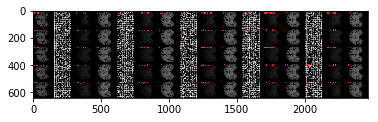

[(1, 160, 192, 224, 3), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1)]
[(1, 160, 192, 224, 3), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1)]
[(1, 160, 192, 224, 3), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1)]
[(1, 160, 192, 224, 3), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1)]
[(1, 160, 192, 224, 3), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1)]
[(1, 160, 192, 224, 3), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1)]
[(1, 160, 192, 224, 3), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1)]
[(1, 160, 192, 224, 3), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1)]
[(1, 160, 192, 224, 3), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1

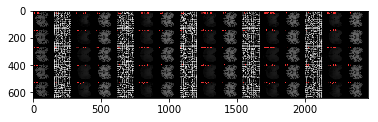

[(1, 160, 192, 224, 3), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1)]
[(1, 160, 192, 224, 3), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1)]
[(1, 160, 192, 224, 3), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1)]
[(1, 160, 192, 224, 3), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1), (1, 160, 192, 224, 1)]


KeyboardInterrupt: 

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

n_dims_to_show = 5
for i in range(len(Xs)):
    X = Xs[i]
    Y = Ys[i]
    
    eval_batch_size = 1
    n_vals = 5
    max_val = 3
    z_range = np.linspace(-max_val, max_val, n_vals, endpoint=True).tolist()

    input_im = X[0]
    flow_im = X[1]
    
    out_im = [None] * n_dims_to_show
    for zdim in range(n_dims_to_show):
        z_dim_ims = [None] * n_vals
        global_z = np.zeros((eval_batch_size, exp.global_transform_latent_dim))

        for zvi, zv in enumerate(z_range):
            global_z[0, zdim] = zv

            
            preds = exp.vae.tester_model.predict([input_im, flow_im, global_z])
            print([p.shape for p in preds])
            flow = preds[0]
            warped = preds[1]
            color_delta = preds[2]
            transformed = preds[-1]
            
            #z_dim_ims[zvi] = vis_utils.label_ims(transformed, zv)
            z_dim_ims[zvi] = np.concatenate([
                vis_utils.label_ims(np.expand_dims(vis_utils.flow_to_grid(flow[0, :, :, slice_idx, :2], spacing=6), axis=0), zv),
                vis_utils.label_ims(color_delta[:, :, :, slice_idx], 'color_delta'),
                vis_utils.label_ims(transformed[:, :, :, slice_idx], zv),
            ], axis=1)
        out_im[zdim] = np.concatenate(z_dim_ims, axis=0)
    out_im = np.concatenate([
        vis_utils.label_ims(np.tile(input_im[:, :, :, slice_idx], (n_vals, 1, 1, 1)), 'input')]  +
        out_im, axis=1)
    plt.imshow(out_im[:, :, [2, 1, 0]])
    plt.show()
#     IPython.display.display(PIL.Image.fromarray(out_im[:, :, [2, 1, 0]]))

In [ ]:
curr_vae = exp.vae#_flow

# visualize what happens when we sweep local z
out_dir = './z_sweep_outputs'
if not os.path.isdir(out_dir):
    os.mkdir(out_dir)
import IPython
n_digits = 10

plot_pcs = False

Xs = []
Ys = []
for i in range(n_digits):
    X, Y, _, _ = next(exp.train_gen)
    Xs.append(X)
    Ys.append(Y)
for i in range(n_digits):
    X, Y, _, _ = next(exp.test_gen)
    Xs.append(X)
    Ys.append(Y)
    
for i in range(len(Xs)):
    X = Xs[i]
    Y = Ys[i]
    
    eval_batch_size = 1
    n_vals = 5
    max_val = 3
    z_range = np.linspace(-max_val, max_val, n_vals, endpoint=True).tolist()

    input_im = X[0]

    local_pz_mean, local_pz_logvar = curr_vae.img_encoding_model.predict(input_im)
    
    if plot_pcs:
        local_z_mean = pca_pz_fitter.transform(local_z_mean)
        local_z_std = pca_pz_fitter.transform(local_z_mean + np.exp(local_z_logvar / 2.)) - local_z_mean
#     %matplotlib inline
#     import matplotlib.pyplot as plt
#     fig = plt.figure(1, figsize=(20, 8))
#     #fig, (ax1, ax2) = fig.subplots(1,2)
#     ax1 = fig.add_subplot(121)
#     ax1.boxplot(local_z_mean)
#     ax2 = fig.add_subplot(122)
#     ax2.boxplot(np.exp(local_z_logvar/2))
#     plt.show()

    global_z = np.zeros((eval_batch_size, global_transform_latent_dim))
    
    out_im = []
    for zdim in range(local_transform_latent_dim):
        z_dim_ims = [None] * n_vals
        local_z = local_pz_mean.copy()  # set all dimensions to mean for now

#         if np.exp(local_z_logvar/2)[0, zdim] <= 0.5:  # ignore dimensions with low variance since they probably dont do anything
#             continue
        
        for zvi, zv in enumerate(z_range):
            if plot_pcs:
                local_z[0, zdim] = local_z_mean[0, zdim] + pcs_pz_std[0, zdim] * zv
                local_z = pca_pz_fitter.inverse_transform(local_z)
            else:
                dim_val = local_pz_mean[0, zdim] + np.exp(local_pz_logvar[0, zdim] / 2.) * zv
                local_z[0, zdim] = dim_val
            
            if not exp.arch_params['local_only']:
                preds = curr_vae.tester_model.predict([input_im, global_z, local_z])
            else:
                preds = curr_vae.tester_model.predict([input_im, local_z])
                
            z_dim_ims[zvi] = np.concatenate([
                vis_utils.label_ims(np.expand_dims(vis_utils.flow_to_grid(preds[0][0], spacing=6), axis=0), zv),
                vis_utils.label_ims(preds[1], 'dim{} = {}'.format(zdim, round(local_z[0, zdim], 2)))
            ], axis=1)
        out_im.append(np.concatenate(z_dim_ims, axis=0))
    out_im = np.concatenate([
        vis_utils.label_ims(np.tile(input_im, (n_vals, 1, 1, 1)), 'input')] + \
        out_im, axis=1)
    cv2.imwrite(os.path.join(out_dir, 'local_z_sweep_{}.png'.format(i)), out_im)
    IPython.display.display(PIL.Image.fromarray(out_im[:, :, [2, 1, 0]]))

In [ ]:
# visualize what happens if we try reconstruction with different inputs
eval_batch_size = 1
z = np.random.randn(eval_batch_size, global_transform_latent_dim)
exp.trainer_model.summary()

train_preds = exp.vae.trainer_model.predict(X)

I_recon = train_preds[-1]
preds = exp.tester_model.predict([I_recon, z])
flow_pred = preds[0]
transformed_pred = preds[1]
recon_pred = preds[-1]



out_im = np.concatenate([
	vis_utils.label_ims(X[0], 'I', inverse_normalize=True),
	vis_utils.label_ims(I_recon, 'recon', inverse_normalize=True),
	vis_utils.label_ims(transformed_pred, 'transformed', inverse_normalize=True)	
], axis=1)

PIL.Image.fromarray(out_im)
